## Final Project Submission
Please fill out:

Student name: Collins Chumba<br>
Student pace: full time<br>
Scheduled project review date/time: 11th - 15th December 2023<br>
Instructor name:<br>
Blog post URL:


## Overview <br>

Microsoft aims to enter the realm of original video content creation by establishing a new movie studio. With this initiative, I am tasked with researching the current trends in successful box office films. The goal is to provide actionable insights to guide the head of Microsoft's movie studio in determining the most promising film genres to pursue.

## Objectives

The main objective of this project is to identify the appropriate movies Microsoft should start making in their new movie studio. 

## Questions to answer

1. Which genre is the best performing?<br>
2. How much money do you need to spend to make a high earning movie? Does the money spent in production influence the profits realized?<br>
3. What is the optimum length of a movie?<br>
4. When is the best time of year to release a movie?


## Data<br>

Datasets used in this project were extracted from the following sites:<br>

1. Box Office Mojo<br>
2. IMDB<br>
3. Rotten Tomatoes<br>
4. TheMovieDB<br>
5. The Numbers<br>
<br>
Because it was collected from various locations, the different files have different formats. Some are compressed CSV (comma-separated values) or TSV (tab-separated values) files that I opened using pd.read_csv, while the data from IMDB is located in a SQLite database.

## Importing Libraries, Datasets and Python Packages

In [125]:
# import libraries
import numpy as np
import pandas as pd
import sqlite3


import csv

# import data visualization packages
import matplotlib.pyplot as plt


## Geting started
## 1.1 Top perfoming movie genres according to genres average ratings.

This aims at identifying the top produced genres in the market so as to provide Microsoft studios with an idea of what film to produce so as to generate a high average rating from the industry and in return a higher profit margin as a result of increased sales.

In [126]:
# connecting to the database
conn = sqlite3.connect('zippedData/im.db')
cur =conn.cursor()

 Reading the datasets; basics and ratings of films.

In [127]:
# Querying the database
df = pd.read_sql (""" SELECT * FROM movie_basics
JOIN movie_ratings
USING (movie_id) """,conn)
df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


# Data cleaning

In [128]:
# We begin with checking for duplicates in our data
df.duplicated().value_counts()
# Since it returned that there are no duplicated values in the data frame 
# we proceed with checking for Nan values

False    73856
Name: count, dtype: int64

No duplicates, lets check the missing values

In [129]:
# check for nan values
df.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

The data subset contains null values in run time minutes and genre with each having 7620 and 804 respectively. We will therefore proceed with droping the rows containing null values.

In [130]:
#dropping the missing rows of data
df = df.dropna()

In [131]:
# Checking for missing values in the dataset
df.isna().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [132]:
# Checking basic descriptive statistics
df.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,65720.000000,65720.000000,65720.000000,6.572000e+04
mean,2014.258065,94.732273,6.320902,3.954674e+03
std,2.600143,209.377017,1.458878,3.208823e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.600000e+01
50%,2014.000000,91.000000,6.500000,6.200000e+01
75%,2016.000000,104.000000,7.300000,3.520000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


The data indicates that the average film duration is 95 minutes, with a positively skewed distribution as the mean is higher than the median, which stands at 91 minutes. Additionally, potential outliers are observed in the minimum and maximum duration values.

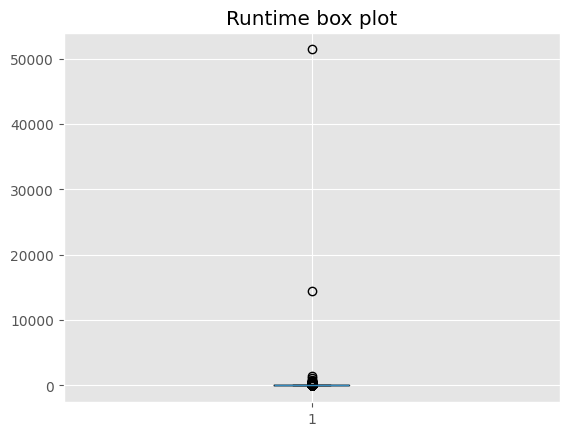

In [133]:
# Visualizing outliers using box plots
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
plt.boxplot(df.runtime_minutes)
plt.title('Runtime box plot')
plt.show()

Lets deal with the outlers

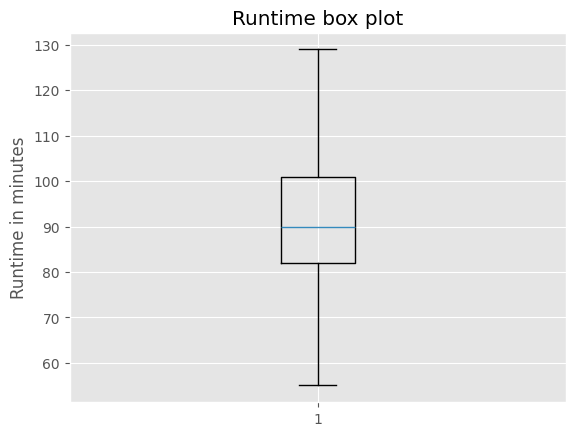

In [134]:
#dealing with the outliers
df1 =df[df['runtime_minutes'].isin(range(55,130))]
plt.style.use("ggplot")
plt.boxplot(df1.runtime_minutes)
plt.ylabel('Runtime in minutes')
plt.title('Runtime box plot')
plt.show()

Our data set is now free from missing values and duplicates and we can threfore proceed with data exploration.

# Data exploration

In [135]:
# Checking the top genres produced
df_genre = df.genres.value_counts().head(12)
df_genre

genres
Drama                   10189
Documentary              9149
Comedy                   4604
Comedy,Drama             2451
Horror                   2232
Drama,Romance            1392
Thriller                 1288
Comedy,Drama,Romance     1159
Comedy,Romance           1128
Horror,Thriller           943
Drama,Thriller            938
Action                    721
Name: count, dtype: int64

Having obtained a significant sample from the population of the genre count we will proceed with grouping our data using the genres so as to obtain a dataset that will enable us to calculate the average rating per genre.

In [136]:
''' This code aims to select only the movies in the sample genre 
we created and puting them in a dataframe which is a summary of the popular genres'''
options = ['Drama',
'Comedy',
'Documentary',
'Comedy,Drama',
'Horror',
'Drama,Romance',
'Thriller',
'Comedy,Drama,Romance',
'Comedy,Romance',
'Horror,Thriller',
'Drama,Thriller',
'Action']
dfg = df1[df1['genres'].isin(options)]
dfg.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
10,tt0162942,Children of the Green Dragon,A zöld sárkány gyermekei,2010,89.0,Drama,6.9,120
11,tt0170651,T.G.M. - osvoboditel,T.G.M. - osvoboditel,2018,60.0,Documentary,7.5,6
13,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,4.0,72
14,tt0230212,The Final Journey,The Final Journey,2010,120.0,Drama,8.8,8


In [137]:
# This code aims at displaying the grouped data frame that will be grouped by genre and movie id
genre_grouping = dfg.groupby(['genres','movie_id'])
genre_grouping1 = genre_grouping.first()
genre_grouping1.head()

primary_title      original_title  start_year  \
genres movie_id                                                        
Action tt0439801  Segurança Nacional  Segurança Nacional        2010   
       tt0810815      Cross the Line      Cross the Line        2010   
       tt0846004   Gangster Exchange   Gangster Exchange        2010   
       tt0929742        Deep Gold 3D           Deep Gold        2011   
       tt0977639       Boyle Heights       Boyle Heights        2010   

                  runtime_minutes  averagerating  numvotes  
genres movie_id                                             
Action tt0439801             86.0            3.3       260  
       tt0810815             87.0            3.9        39  
       tt0846004             95.0            4.6       436  
       tt0929742             86.0            3.3       315  
       tt0977639            101.0            4.6         9

Having grouped the data we will now proceed with tabulating the averagerating mean per genre.

In [138]:
# a code to calculate the mean average genre rating/sorting the values
avgrating_mean = dfg.groupby('genres')['averagerating'].mean().sort_values(ascending=False).head(12)
#rounding off the values
avgrating_mean  = round(avgrating_mean,1)
avgrating_mean

genres
Documentary             7.3
Drama                   6.5
Comedy,Drama            6.4
Comedy,Drama,Romance    6.3
Drama,Romance           6.2
Drama,Thriller          6.1
Comedy,Romance          5.8
Comedy                  5.8
Action                  5.6
Thriller                5.5
Horror,Thriller         4.7
Horror                  4.7
Name: averagerating, dtype: float64

# Data visuals

Text(0.5, 1.0, 'Movie Genre')

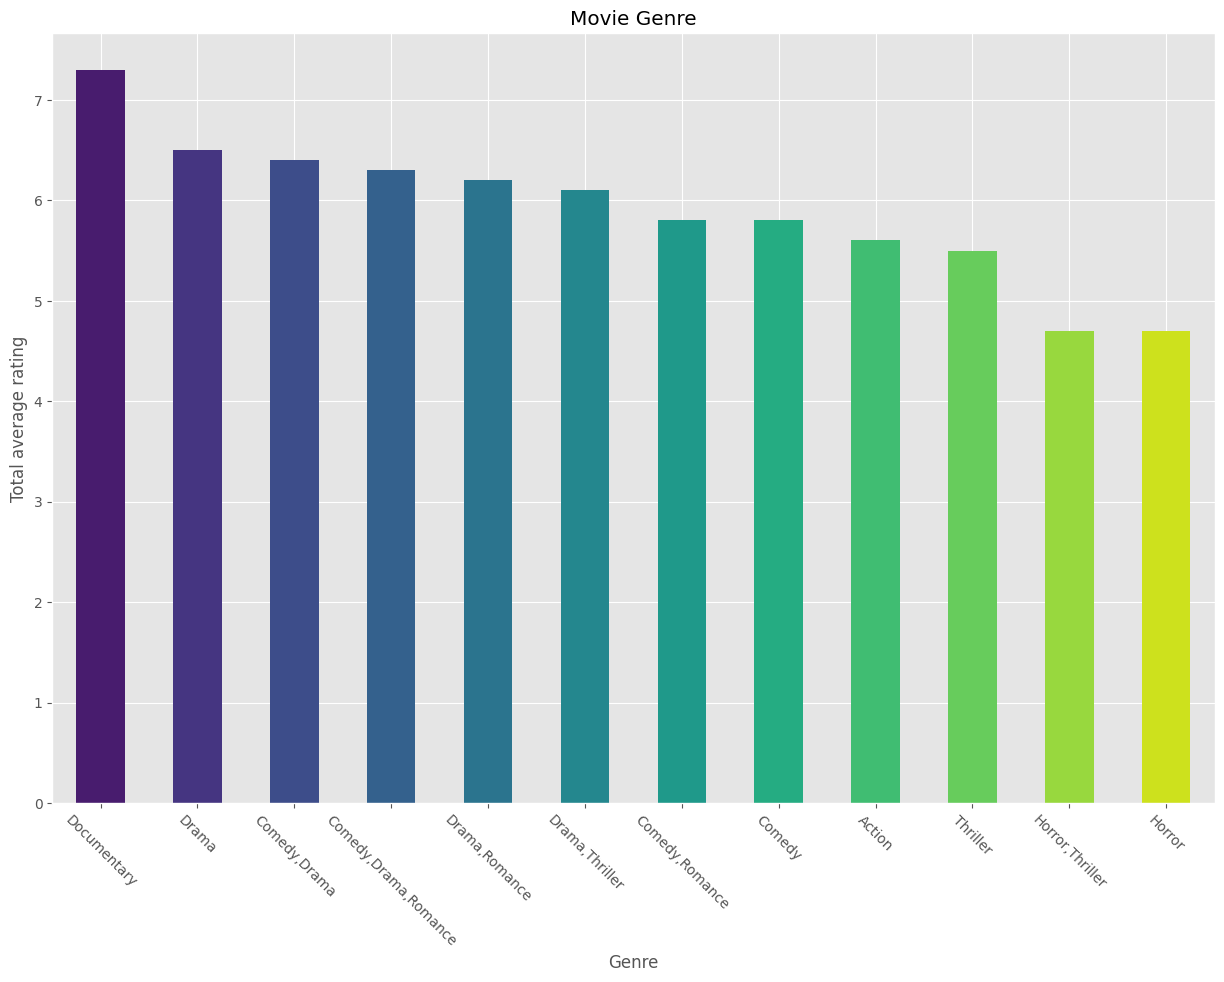

In [139]:
# A code to plot the bargraph
fig, ax = plt.subplots(figsize=(15, 10))

# Use the plot method on the DataFrame
avgrating_mean.plot(kind='bar', ax=ax, rot=-45, legend=False, color= sns.color_palette("viridis", len(avgrating_mean)))

plt.xlabel('Genre')
plt.ylabel('Total average rating')
plt.title('Movie Genre')


Conclusion 1:

After analyzing the movie industry data, it is evident that different genres exhibit distinct performance patterns based on average ratings. The genres of documentary and drama emerge as the top performers, boasting average ratings surpassing 6. It is strongly recommended to prioritize genre consideration when deciding on movie production, ensuring alignment with the desired target ratings and optimizing business outcomes for the studio.

# 1.2 What is the optimum length of a movie?<br>
Converted the runtime objects to floats.<br>
Compared the runtime column to the foreign gross column.
Lets go ahead to read the csv file;     'zippedData/bom.movie_gross.csv.gz'

In [140]:
# reading the first dataset
pd.read_csv('zippedData/bom.movie_gross.csv.gz').head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


Open the following tsv file:<br>
    'zippedData/rt.movie_info.tsv.gz'


In [143]:
# reading the fourth dataset
pd.read_table('zippedData/rt.movie_info.tsv.gz').head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


Assigning variable names

In [187]:
# reading the datasets into a dataframe
df_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
df_movieinfo = pd.read_table('zippedData/rt.movie_info.tsv.gz')

## Data cleaning<br>
Finding out more information about the datasets, i.e. Whether or not they have null values, duplicates, etc.

In [188]:
df_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


This shows that the data set has 3 data types: objects, floats and integers. The foreign_gross column should have 'float' datatype instead of 'object'. I made the conversion to avoid any distortion within my analysis.

In [189]:
# removing object in the foreign_gross column
df_gross['foreign_gross'] = [float(str(x).replace(',', '')) for x in df_gross['foreign_gross']]

In [191]:
# Rechecking df_gross
df_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [192]:
df_gross.shape

(3387, 5)

The dataset has 3387 rows and 5 columns

In [193]:
# previewing the data
df_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [194]:
# checking for null values
df_gross.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [195]:
# Dropping the  null values 
df_gross.dropna(axis = 0, inplace = True)

In [196]:
# confirming the missing values were dropped
df_gross.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [197]:
# checking for duplicates
df_gross.duplicated().sum()

0

0 duplicates

In [198]:
df_movieinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


This shows that the data set has 2 data types: objects and integers.

In [199]:
df_movieinfo.shape

(1560, 12)

The dataset has 1560 rows and 7 columns

In [200]:
# previewing the data
df_movieinfo.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [202]:
# calculate percentage of null values
df_movieinfo.isnull().sum()*100/len(df_movieinfo)

id               0.000000
synopsis         3.974359
rating           0.192308
genre            0.512821
director        12.756410
writer          28.782051
theater_date    23.012821
dvd_date        23.012821
currency        78.205128
box_office      78.205128
runtime          1.923077
studio          68.333333
dtype: float64

The studio column has a significant amount of missing values but can't be dropped as I shall use it to merge datasets later. Therefore, I shall use the fillna() method to replace those values in the original DataFrame instead.

In [204]:
df_movieinfo['studio'].fillna('Unknown', inplace = True)
df_movieinfo.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,Unknown
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,Unknown
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,Unknown
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,Unknown


In [205]:
# dropping unnecessary columns
df_movieinfo.drop(['synopsis', 'theater_date', 'dvd_date', 'currency', 'box_office', 'director', 'writer'], axis = 1, inplace = True)

In [206]:
df_movieinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1560 non-null   int64 
 1   rating   1557 non-null   object
 2   genre    1552 non-null   object
 3   runtime  1530 non-null   object
 4   studio   1560 non-null   object
dtypes: int64(1), object(4)
memory usage: 61.1+ KB


In [207]:
# checking for null values
df_movieinfo.isnull().sum()

id          0
rating      3
genre       8
runtime    30
studio      0
dtype: int64

In [208]:
# checking for the percentage of null values
df_movieinfo.isnull().sum()*100/len(df_movieinfo)

id         0.000000
rating     0.192308
genre      0.512821
runtime    1.923077
studio     0.000000
dtype: float64

The percentage of missing values in the rating, genre and runtime columns are close to negligible. However, to avoid any potential errors, I opted to replace those values in the original DataFrame instead using the fillna() method.

In [209]:
df_movieinfo['rating'].fillna('Unknown', inplace = True)

In [210]:
df_movieinfo['genre'].fillna('Unknown', inplace = True)

In [211]:
df_movieinfo['runtime'].fillna('Unknown', inplace = True)

In [213]:
df_movieinfo.head()

,id,rating,genre,runtime,studio
0,1,R,Action and Adventure|Classics|Drama,104 minutes,Unknown
1,3,R,Drama|Science Fiction and Fantasy,108 minutes,Entertainment One
2,5,R,Drama|Musical and Performing Arts,116 minutes,Unknown
3,6,R,Drama|Mystery and Suspense,128 minutes,Unknown
4,7,NR,Drama|Romance,200 minutes,Unknown


## Merging datasets<br>

In [214]:
# merging the first datasets
df_mydata = pd.merge(df_gross, df_movieinfo, how = 'inner', left_on = 'studio', right_on = 'studio')
df_mydata

,title,studio,domestic_gross,foreign_gross,year,id,rating,genre,runtime
0,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,611,R,Drama|Mystery and Suspense,137 minutes
1,Inception,WB,292600000.0,535700000.0,2010,611,R,Drama|Mystery and Suspense,137 minutes
2,Clash of the Titans (2010),WB,163200000.0,330000000.0,2010,611,R,Drama|Mystery and Suspense,137 minutes
3,Due Date,WB,100500000.0,111200000.0,2010,611,R,Drama|Mystery and Suspense,137 minutes
4,Yogi Bear,WB,100200000.0,101300000.0,2010,611,R,Drama|Mystery and Suspense,137 minutes
...,...,...,...,...,...,...,...,...,...
360,Lady Bird,A24,49000000.0,30000000.0,2017,1399,R,Drama|Horror,91 minutes
361,The Disaster Artist,A24,21100000.0,8700000.0,2017,1399,R,Drama|Horror,91 minutes
362,It Comes At Night,A24,14000000.0,5300000.0,2017,1399,R,Drama|Horror,91 minutes
363,Hereditary,A24,44100000.0,35300000.0,2018,1399,R,Drama|Horror,91 minutes


In [215]:
# checking for null values
df_mydata.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
id                0
rating            0
genre             0
runtime           0
dtype: int64

In [216]:
# checking for duplicates
df_mydata.duplicated().sum()

0

## Exploratory Data Analysis (EDA)

In [217]:
# removing object in the foreign_gross column
df_mydata['runtime'] = [float(str(x).replace('minutes', '')) for x in df_mydata['runtime']]

Text(0.5, 0, 'Runtime')

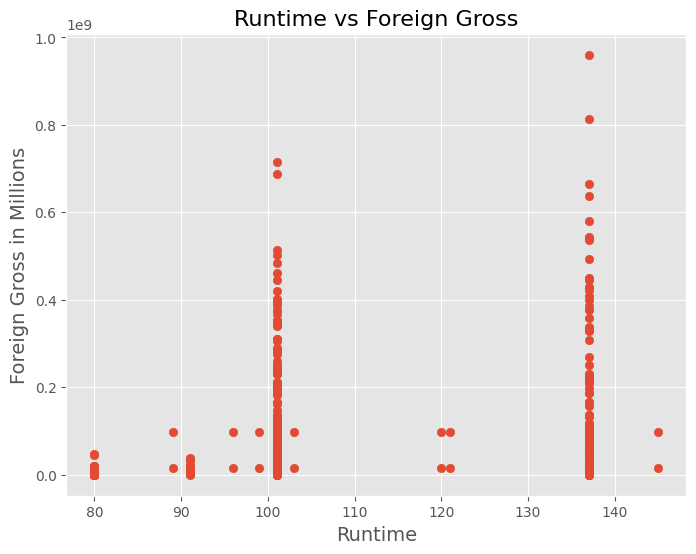

In [218]:
fig, ax= plt.subplots(figsize=(8,6))

x = df_mydata['runtime']
y = df_mydata['foreign_gross']

ax.scatter(x,y)
# naming the axes and plot title
ax.set_title('Runtime vs Foreign Gross', fontsize=16)
ax.set_ylabel("Foreign Gross in Millions", fontsize=14)
ax.set_xlabel("Runtime",fontsize=14)

The above diagram shows that the popular runtimes are 101 minutes and 137 minutes.

(79.0, 148.25)

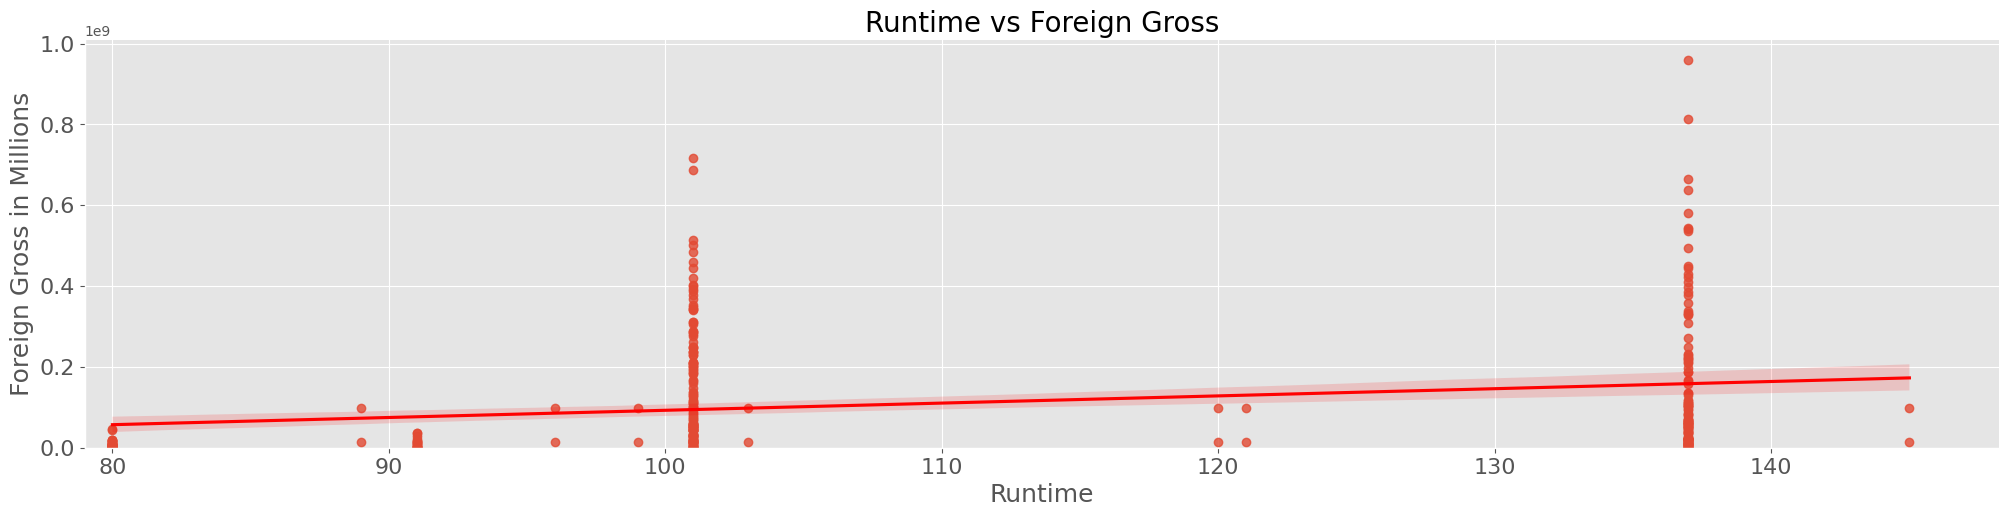

In [220]:
sns.lmplot(x = 'runtime', y = 'foreign_gross', data = df_mydata, aspect = 4, line_kws = {'color': 'red'})
# naming the axes and plot title
plt.title('Runtime vs Foreign Gross', fontsize = 20)
plt.xlabel('Runtime', fontsize = 18)
plt.ylabel('Foreign Gross in Millions', fontsize = 18)
# setting the axes tick values and limits
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylim(0,None)
plt.xlim(79, None)

Conclusion 2:<br>
The inclusion of a regression line reveals a positive correlation between movie runtime and foreign gross. Specifically, movies with a runtime of 101 minutes exhibit the potential for a foreign gross of around 700 million, whereas those with a runtime of 137 minutes could potentially achieve approximately 800 million in foreign gross.

# 1.3 What is the correlation between budget and revenue generated for a given movie?<br>
i) Evaluate the significance of increace in budget towards the revenue generated.<br>
ii) Connduct a correlation analysis to identify the relationship between the two.

In [222]:
#creating a dataframe of the csv
mov_budget= pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
mov_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


# Data cleanng

In [223]:
# removing the $ sign from the columns
mov_budget.production_budget = mov_budget.production_budget.str.replace('$','') 
mov_budget.domestic_gross = mov_budget.domestic_gross.str.replace('$','')
mov_budget.worldwide_gross = mov_budget.worldwide_gross.str.replace('$','')

In [224]:
# removing the commas from the columns
mov_budget.production_budget = mov_budget.production_budget.str.replace(',','') 
mov_budget.domestic_gross = mov_budget.domestic_gross.str.replace(',','')
mov_budget.worldwide_gross = mov_budget.worldwide_gross.str.replace(',','')

In [225]:
#converting the data type to int
mov_budget.production_budget = mov_budget.production_budget.astype(int)
mov_budget.domestic_gross = mov_budget.domestic_gross.astype(int)
mov_budget.worldwide_gross = mov_budget.worldwide_gross.astype(float)

In [226]:
# removing 0 values
mov_budget = mov_budget.loc[~ ((mov_budget.production_budget ==0)|(mov_budget.domestic_gross ==0)|(mov_budget.worldwide_gross ==0))]  

# Data visuals

In [227]:
#cleaned dataframe
mov_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1.316722e+09


In [228]:
#Creating the column revenue and profits
mov_budget['revenue']= mov_budget.domestic_gross + mov_budget.worldwide_gross
mov_budget['Profits']= mov_budget.revenue - mov_budget.production_budget

In [230]:
# Sorting the values so as to order them in descending order based on profits
mov_budget = mov_budget.sort_values(by=["Profits"],ascending=False)
mov_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenue,Profits
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09,3.536853e+09,3.111853e+09
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2.053311e+09,2.989973e+09,2.683973e+09
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2.208208e+09,2.867572e+09,2.667572e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2.048134e+09,2.726950e+09,2.426950e+09
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1.648855e+09,2.301125e+09,2.086125e+09


Visuals in regards to the budget and the profits.

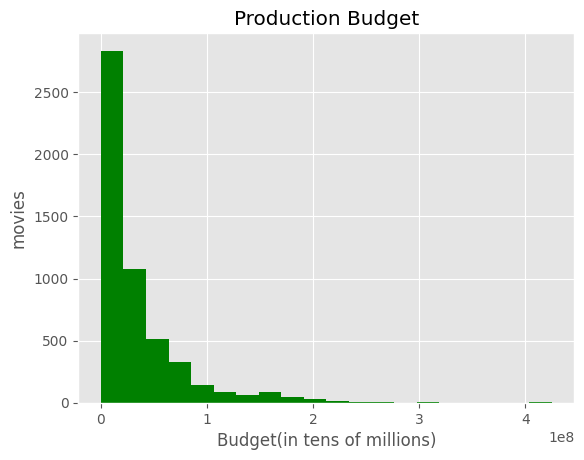

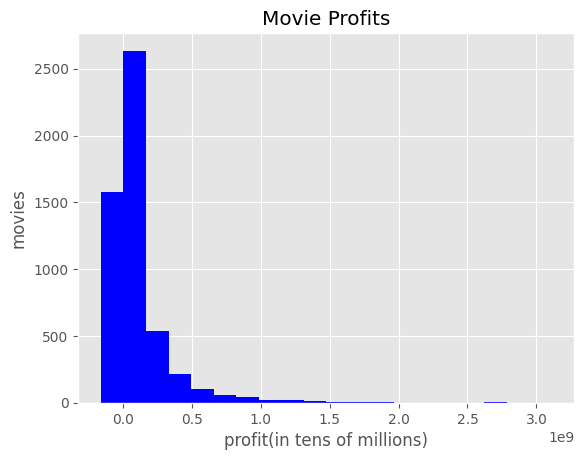

In [231]:
plt.hist(mov_budget.production_budget,color='green', bins=20)
plt.xlabel('Budget(in tens of millions)')
plt.ylabel('movies')
plt.title('Production Budget')
plt.show()
plt.hist(mov_budget.Profits,color='blue', bins=20)
plt.xlabel('profit(in tens of millions)')
plt.ylabel('movies')
plt.title('Movie Profits')
plt.show()

This visualization illustrates a prevalent trend in the film industry, indicating that the majority of movies have been produced within a constrained budget. To assess the relationship between substantial expenditures and resulting profitability, a correlation analysis is essential.

Specifically, we aim to determine the correlation between the budget allocated for movie production and the ensuing profits generated. This analysis will provide insights into whether higher budget allocations correspond to increased profitability in the film industry.

In [232]:
#Correlation analysis budget vs profits
correlationn_matrix = np.corrcoef(mov_budget.production_budget,mov_budget.Profits)
correlationn_matrix

array([[1.        , 0.63879082],
       [0.63879082, 1.        ]])

From the analysis we find that the correlation is at 0.64 wich signifies strong positive correlation.This implies that movies that had high budgets equally had high profits. This can be visualised by a scatter plot below.

Text(0.5, 1.0, 'Profits Vs Budget')

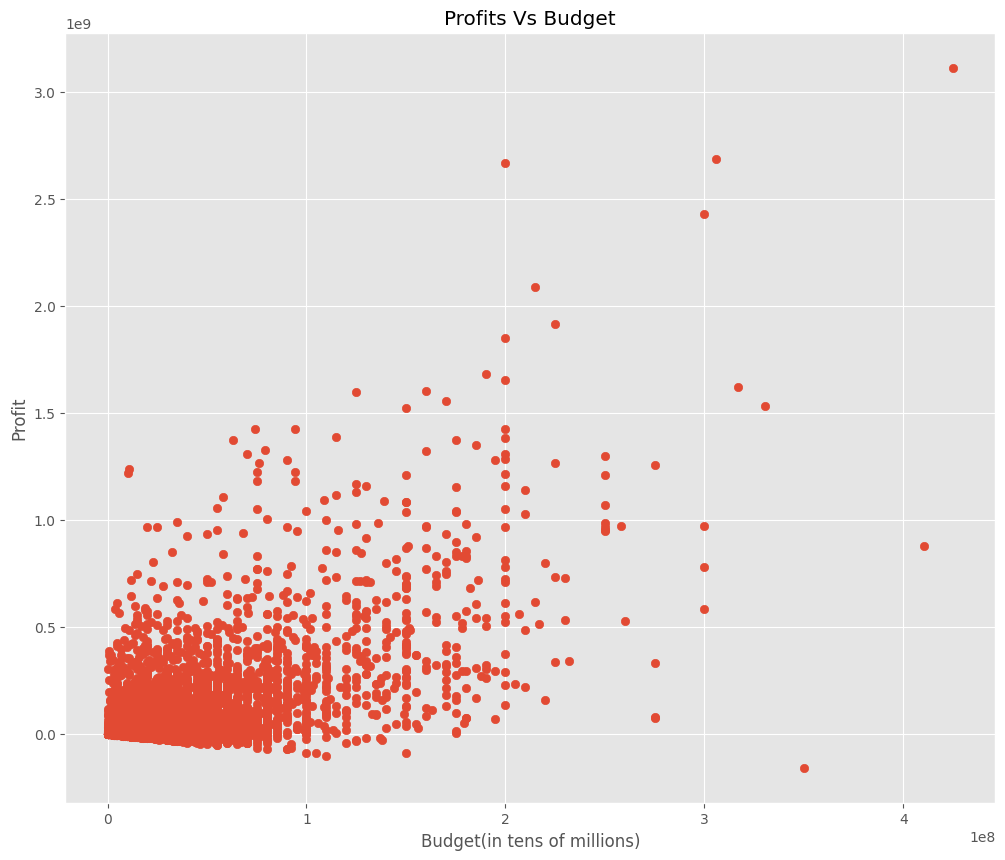

In [233]:
#ploting a scatter plot to visualize correlation.
fig,ax = plt.subplots(figsize=(12,10))
ax.scatter(mov_budget.production_budget,mov_budget.Profits)
plt.xlabel('Budget(in tens of millions)')
plt.ylabel('Profit')
plt.title('Profits Vs Budget')

In [234]:
conn.close()

# Recommendations:

### 1. Genre Selection for Optimal Ratings:
Based on the analysis, it is recommended to prioritize the production of documentary and drama genres, as they have consistently demonstrated high average ratings exceeding 6. This strategic genre selection aligns with the goal of achieving favorable viewer reception and can contribute to the success of Microsoft's movie studio. However, it's essential to further explore and understand the target audience preferences within these genres to tailor content accordingly.

### 2. Optimizing Movie Runtimes for Foreign Gross:
Considering the positive correlation between movie runtime and foreign gross, it is advisable to carefully manage the duration of movies to maximize international revenue. The analysis suggests that movies with a runtime of around 101 minutes may yield a foreign gross of approximately 700 million, while those with a runtime of 137 minutes could potentially achieve around 800 million. Therefore, the movie studio should aim for an optimal balance in runtime, taking into account audience engagement and international market dynamics.

### 3. Strategic Budget Allocation for Profit Maximization:
The observed direct proportionality between the budget assigned to movie production and the generated profits emphasizes the importance of strategic budget allocation. To maximize returns, Microsoft's movie studio should carefully consider and allocate resources effectively, ensuring that the budget aligns with the expected scale and requirements of the movie. Additionally, exploring cost-effective production methods without compromising quality can contribute to increased profitability.

In summary, by strategically selecting genres with high average ratings, optimizing movie runtimes for international markets, and strategically allocating budgets, Microsoft's movie studio can enhance its chances of producing successful and profitable films in the dynamic and competitive movie industry.